In [82]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [83]:
df = pd.read_excel("magazine_reviews_cleanup.xlsx")

In [84]:
df

,overall,vote,verified,reviewTime,reviewerName,reviewText,summary
0,5,0,True,"07 14, 2014",Alvey,great read every issue,Five Stars
1,3,0,True,"06 24, 2014",Jeff A Milne,magazine great times technology magazines new ...,Great While it lasted
2,5,0,True,"06 1, 2014",P. R THOMPSON,ive read maximum pc mpc many years articles te...,For Both the Newbie and The Advanced PC User
3,5,0,True,"05 15, 2014",Earle Williams,ordered magazine grandson then 7 going 30 wasi...,Great Gift
4,4,0,True,"03 28, 2014",JJM,subscribed nook version years thoroughly enjoy...,Decent magazine at a good price
...,...,...,...,...,...,...,...
58649,5,0,True,"08 16, 2016",Katie Reid,nice surprise boyfriend really enjoyed olympic...,Quick Delivery
58650,1,0,True,"08 10, 2016",John,magazine looks like printed recycled shoe rubb...,One Star
58651,5,0,True,"07 31, 2016",Jeff Johnson,cant go wrong si subscription pleased,great magazine
58652,5,0,True,"10 5, 2017",David Lashaway,magazine far time favorite one metal detecting...,Favorite metal detecting magazine


In [85]:
five_star_reviews = df.loc[df.overall == 5]
one_star_reviews = df.loc[df.overall == 1]

In [86]:
five_star_reviews

,overall,vote,verified,reviewTime,reviewerName,reviewText,summary
0,5,0,True,"07 14, 2014",Alvey,great read every issue,Five Stars
2,5,0,True,"06 1, 2014",P. R THOMPSON,ive read maximum pc mpc many years articles te...,For Both the Newbie and The Advanced PC User
3,5,0,True,"05 15, 2014",Earle Williams,ordered magazine grandson then 7 going 30 wasi...,Great Gift
6,5,0,True,"01 5, 2014",Vista Bill Raley,one time least favorite computer magazine comp...,It grows on you!
8,5,0,True,"10 30, 2013",TG,inexpensive im getting esubscription would kep...,Got the Renewal for only $5 at the time
...,...,...,...,...,...,...,...
58648,5,0,True,"08 21, 2016",rwish34,excellant value legendary sports magazine,Five Stars
58649,5,0,True,"08 16, 2016",Katie Reid,nice surprise boyfriend really enjoyed olympic...,Quick Delivery
58651,5,0,True,"07 31, 2016",Jeff Johnson,cant go wrong si subscription pleased,great magazine
58652,5,0,True,"10 5, 2017",David Lashaway,magazine far time favorite one metal detecting...,Favorite metal detecting magazine


In [87]:
one_star_reviews

,overall,vote,verified,reviewTime,reviewerName,reviewText,summary
45,1,10,True,"01 31, 2004",AZS,unbelievable amount ads 5 year ok plan much re...,At least 90% ads
60,1,16,True,"03 18, 2011",Amazoneer,receive notice autorenew notice 9months advanc...,Watch the auto-renew...pretty slick...sleezy?
73,1,0,True,"01 31, 2015",Hoyett L. Barnett,nothing it advertisement little article content,Nothing to it. Just an advertisement. Little a...
75,1,0,True,"03 2, 2018",Vickie Rue,ive gotten one far know,This is the secont time this has happened to m...
76,1,4,True,"02 18, 2018",kandylandmo,changed magazine trash canceled subscription,One Star
...,...,...,...,...,...,...,...
58591,1,0,True,"10 26, 2016",Sharon Jones,disappointed download magazine repeated attempts,Does Not Work!!!!!
58604,1,0,True,"02 12, 2017",Renae,full adds wish would give real product reviews,One Star
58616,1,0,True,"09 19, 2017",SeaWye,disappointed one magazine two tried cancel ord...,I was disappointed. One in the magazine Two I ...
58620,1,0,True,"07 7, 2016",Ned C. Wilson,terrible complete waste money,Terrible. Complete waste of money


In [88]:
one_star_words = one_star_reviews.assign(word = one_star_reviews["reviewText"].str.split()).explode("word")["word"]
five_star_words = five_star_reviews.assign(word = five_star_reviews["reviewText"].str.split()).explode("word")["word"]
one_star_words.head()

45    unbelievable
45          amount
45             ads
45               5
45            year
Name: word, dtype: object

In [89]:
counted_one_star: dict[str, int] = (one_star_words.value_counts()).head(1000).to_dict()
counted_five_star: dict[str, int] = (five_star_words.value_counts()).head(1000).to_dict()

In [90]:
wc_one_star = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(counted_one_star)
wc_five_star = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(counted_five_star)

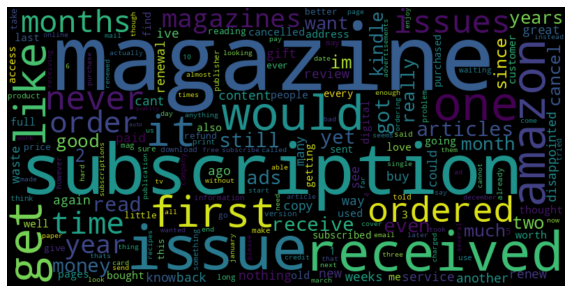

In [91]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_one_star, interpolation='bilinear')
plt.axis('off')
plt.show()

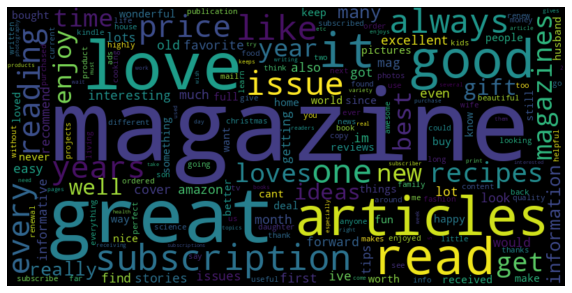

In [92]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_five_star, interpolation='bilinear')
plt.axis('off')
plt.show()